In [144]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,f1_score,accuracy_score

from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

# from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

In [ ]:
# filepath_os = Path(os.path.join('F:/','Dataset','Scania Truck APS Failure','aps_failure_training_set.csv'))
# print(filepath_os)
# df = pd.read_csv(filepath_os)

F:\Dataset\Scania Truck APS Failure\aps_failure_training_set.csv


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Raj-Narayanan-B/Dataset/main/Scania%20Truck%20APS%20Failure/aps_failure_training_set.csv')

In [3]:
df.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [4]:
cols = df.columns.tolist()[1:]

In [5]:
# col=list(df.columns)
# for k in col:
#     lst=[]
#     strng='1'
#     null_list=['na','nan','null']
#     for i in range(len(df[k])):
#         strng=str(df[k][i])
#         for l in strng:
#             for a in null_list:
#                 if (strng.casefold()==a):
#                     lst.append(strng)
#             if (strng.isdigit()):
#                 i+=1
#             elif (strng.isalpha()):
#                 if (not(l in string.ascii_letters)):
#                     lst.append(strng)
#                 i+=1
#             else:
#                 if (not(l in string.digits)):
#                     try:
#                         if isinstance(float(strng),float):
#                             i+=1
#                     except:
#                         lst.append(strng)
#     if (len(lst)!=0):
#         print (k,"\n",pd.unique(lst),"\n")

In [6]:
# for i in cols:
#     df[i]=pd.to_numeric(df[i],errors='coerce',downcast='integer')

In [7]:
for i in cols:
    df[i].replace('na',np.nan,inplace=True)

In [8]:
df.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698    NaN  2130706438    280      0      0      0      0      0   
1   neg   33058    NaN           0    NaN      0      0      0      0      0   
2   neg   41040    NaN         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874    NaN        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [9]:
for i in cols:
    df[i]=df[i].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), object(1)
memory usage: 78.3+ MB


In [11]:
df.describe().T

count          mean           std  min    25%      50%       75%  \
aa_000  60000.0  5.933650e+04  1.454301e+05  0.0  834.0  30776.0   48668.0   
ab_000  13671.0  7.131885e-01  3.478962e+00  0.0    0.0      0.0       0.0   
ac_000  56665.0  3.560143e+08  7.948749e+08  0.0   16.0    152.0     964.0   
ad_000  45139.0  1.906206e+05  4.040441e+07  0.0   24.0    126.0     430.0   
ae_000  57500.0  6.819130e+00  1.615434e+02  0.0    0.0      0.0       0.0   
...         ...           ...           ...  ...    ...      ...       ...   
ee_007  59329.0  3.462714e+05  1.728056e+06  0.0  110.0  41098.0  167814.0   
ee_008  59329.0  1.387300e+05  4.495100e+05  0.0    0.0   3812.0  139724.0   
ee_009  59329.0  8.388915e+03  4.747043e+04  0.0    0.0      0.0    2028.0   
ef_000  57276.0  9.057895e-02  4.368855e+00  0.0    0.0      0.0       0.0   
eg_000  57277.0  2.127556e-01  8.830641e+00  0.0    0.0      0.0       0.0   

                 max  
aa_000  2.746564e+06  
ab_000  2.040000e+02  
ac_000  2.130707e+09  
ad_000  8.584298e+09  
ae_000  2.105000e+04  
...              ...  
ee_007  1.195801e+08  
ee_008  1.926740e+07  
ee_009  3.810078e+06  
ef_000  4.820000e+02  
eg_000  1.146000e+03  

[170 rows x 8 columns]

In [12]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [13]:
df['class']=df['class'].map({'neg':0,'pos':1})

In [14]:
df['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), int64(1)
memory usage: 78.3 MB


In [16]:
df.head()

class   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0      0  76698.0     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1      0  33058.0     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2      0  41040.0     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3      0     12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4      0  60874.0     NaN  1.368000e+03   458.0     0.0     0.0     0.0   

   ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0     0.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [17]:
np.sort(df.isna().sum())

array([    0,     0,   167,   338,   338,   338,   473,   589,   589,
         589,   589,   629,   629,   629,   629,   629,   629,   642,
         642,   642,   642,   642,   645,   645,   669,   669,   669,
         669,   669,   669,   669,   669,   669,   669,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   676,   687,   687,   687,   687,   687,   687,
         687,   687,   687,   687,   688,   688,   688,   688,   688,
         688,   688,   688,   688,   688,   691,   691,   691,   691,
         726,   726,  2500,  2500,  2500,  2500,  2501,  2502,  2503,
        2503,  2723,  2723,  2723,  2723,  2723,  2723,  2724,  2724,
        2724,  2724,  2724,  2725,  2726,  2726,  2726,  2726,  2726,
        2727,  2727,

<Axes: >

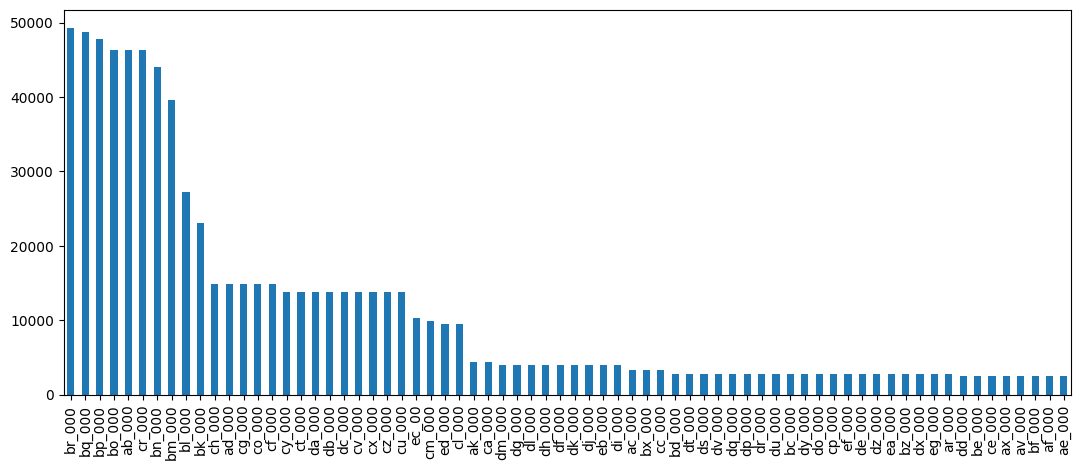

In [18]:
df.isna().sum()[df.isna().sum()>2000].sort_values(ascending=False).plot(kind='bar',figsize=(13,5))

In [19]:
df['br_000'].shape

(60000,)

In [20]:
df.shape

(60000, 171)

In [21]:
(df.isna().sum()[df.isna().sum()>30000]/60000)*100

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64

In [22]:
pd.DataFrame(data=(df.isna().sum()[df.isna().sum()>30000],(df.isna().sum()[df.isna().sum()>30000]/60000)*100)).T.sort_values(by=1,ascending=False)

0          1
br_000  49264.0  82.106667
bq_000  48722.0  81.203333
bp_000  47740.0  79.566667
bo_000  46333.0  77.221667
ab_000  46329.0  77.215000
cr_000  46329.0  77.215000
bn_000  44009.0  73.348333
bm_000  39549.0  65.915000

In [23]:
describe_cols = df.isna().sum()[df.isna().sum()>30000].index
df[describe_cols].describe().T

count           mean            std  min       25%       50%  \
ab_000  13671.0       0.713189       3.478962  0.0       0.0       0.0   
bm_000  20451.0  399603.167571  407071.846632  0.0  172210.0  239140.0   
bn_000  15991.0  463710.833594  464447.341741  0.0  171720.0  251400.0   
bo_000  13667.0  513147.820297  497353.671372  0.0  170550.0  270660.0   
bp_000  12260.0  551389.799347  519611.447203  0.0  172170.0  288320.0   
bq_000  11278.0  582871.322930  536697.028750  0.0  170420.0  305100.0   
br_000  10736.0  604886.613264  547227.872331  0.0  169470.0  320400.0   
cr_000  13671.0      37.062980    1027.001381  0.0       0.0       0.0   

              75%        max  
ab_000        0.0      204.0  
bm_000   369100.0  1310700.0  
bn_000   493100.0  1310700.0  
bo_000  1310700.0  1310700.0  
bp_000  1310700.0  1310700.0  
bq_000  1310700.0  1310700.0  
br_000  1310700.0  1310700.0  
cr_000        0.0    57450.0

In [24]:
df.drop(columns=describe_cols,axis = 1, inplace = True)

In [25]:
df.shape

(60000, 163)

In [26]:
missing_data_index_2000 = df.isna().sum()[df.isna().sum()>2000].sort_values(ascending=False).index

In [27]:
len(missing_data_index_2000)

62

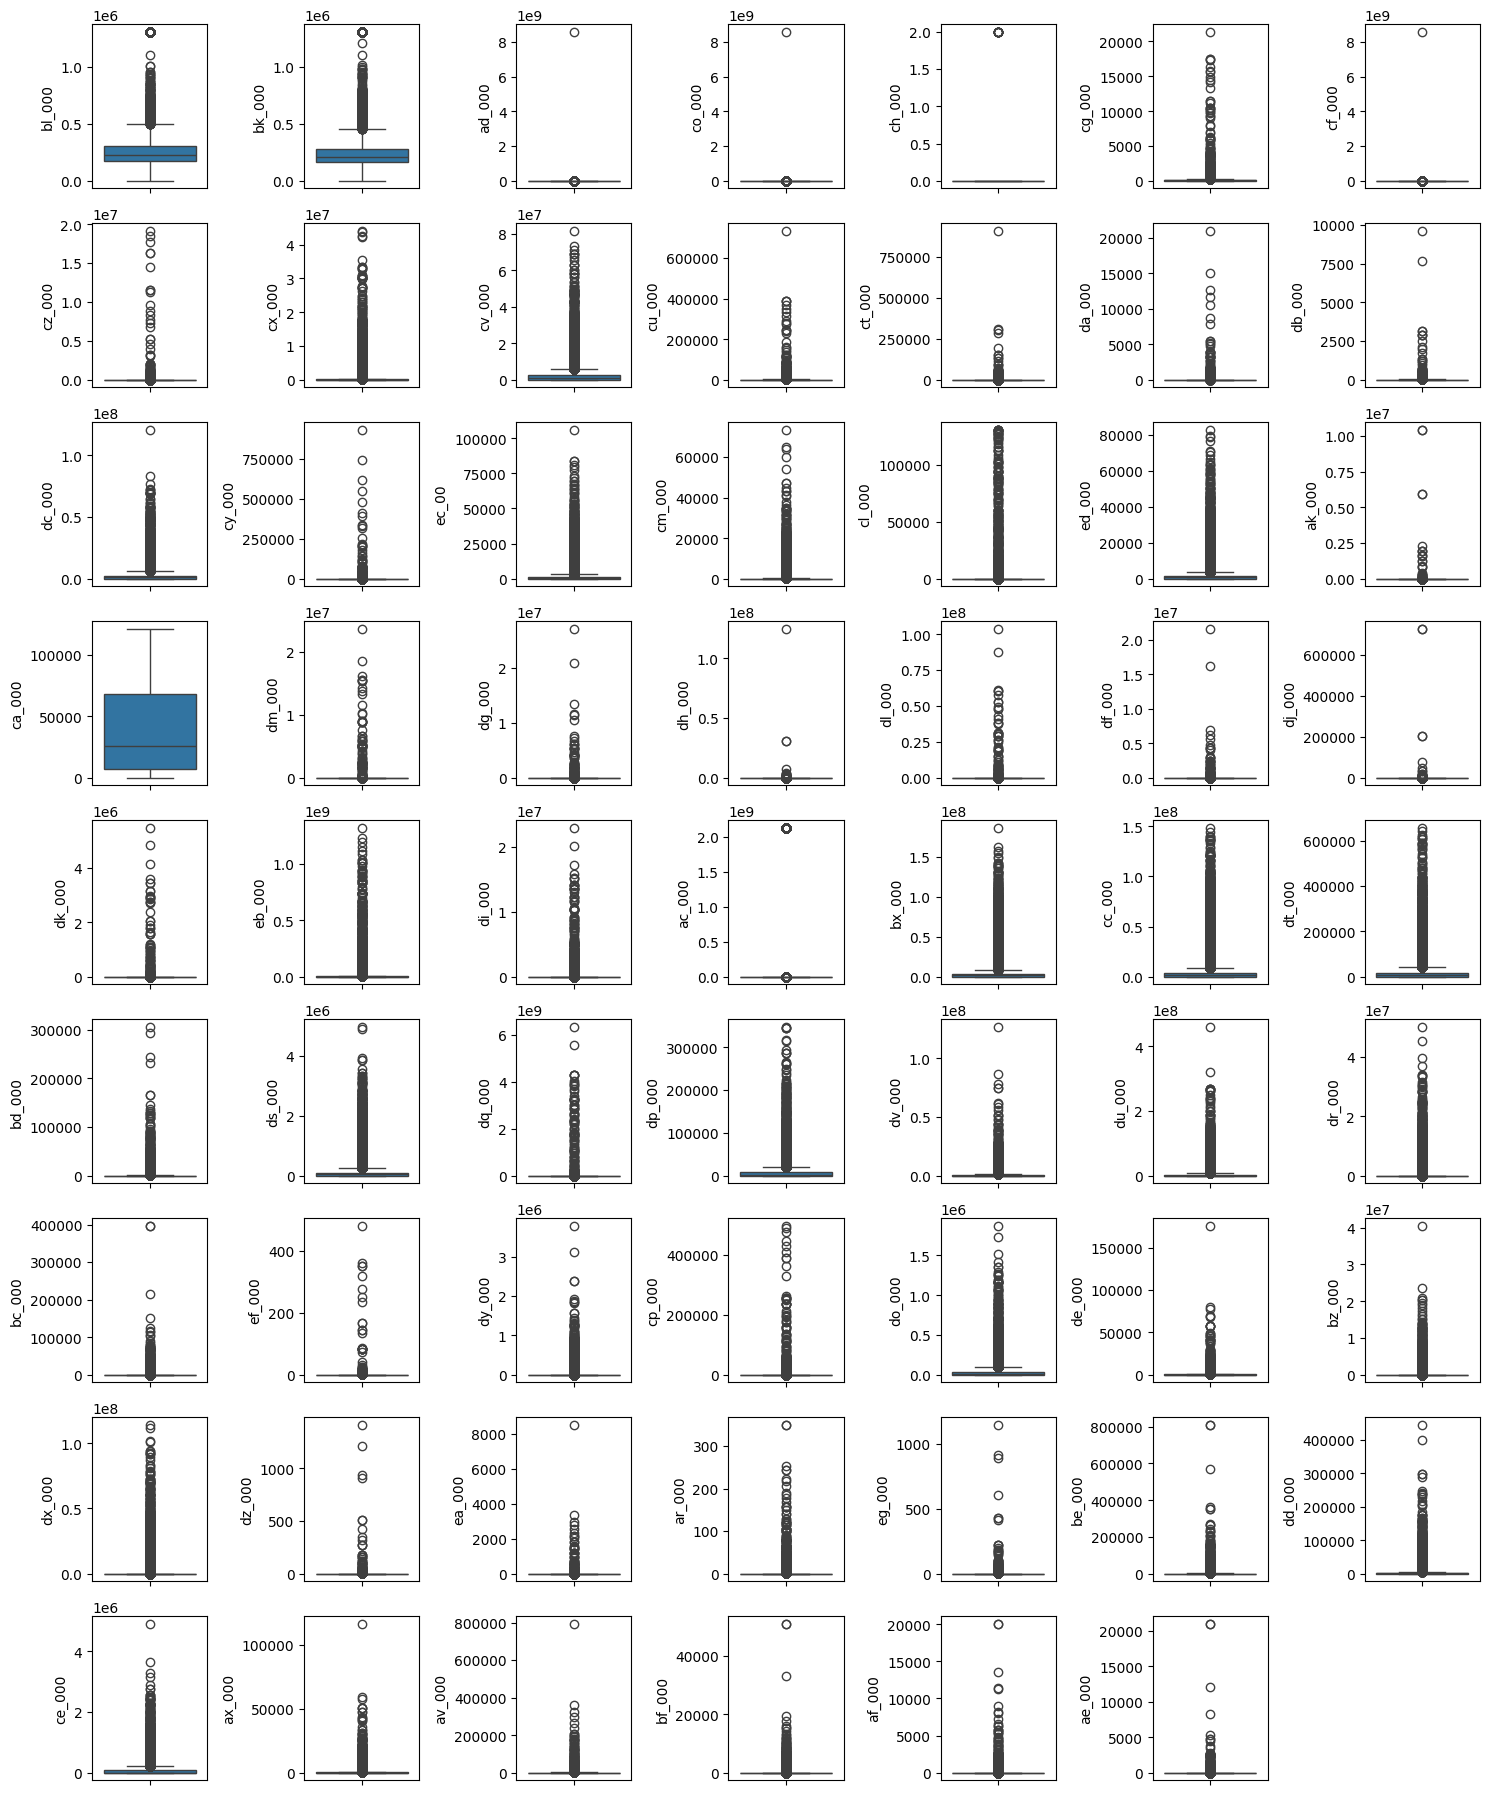

In [ ]:
plt.figure(figsize = (15,20))
for i in range(len(missing_data_index_2000)):
    plt.subplot (10,7,i+1)
    boxplot_object = sns.boxplot(df[missing_data_index_2000[i]])
plt.tight_layout()
plt.show()

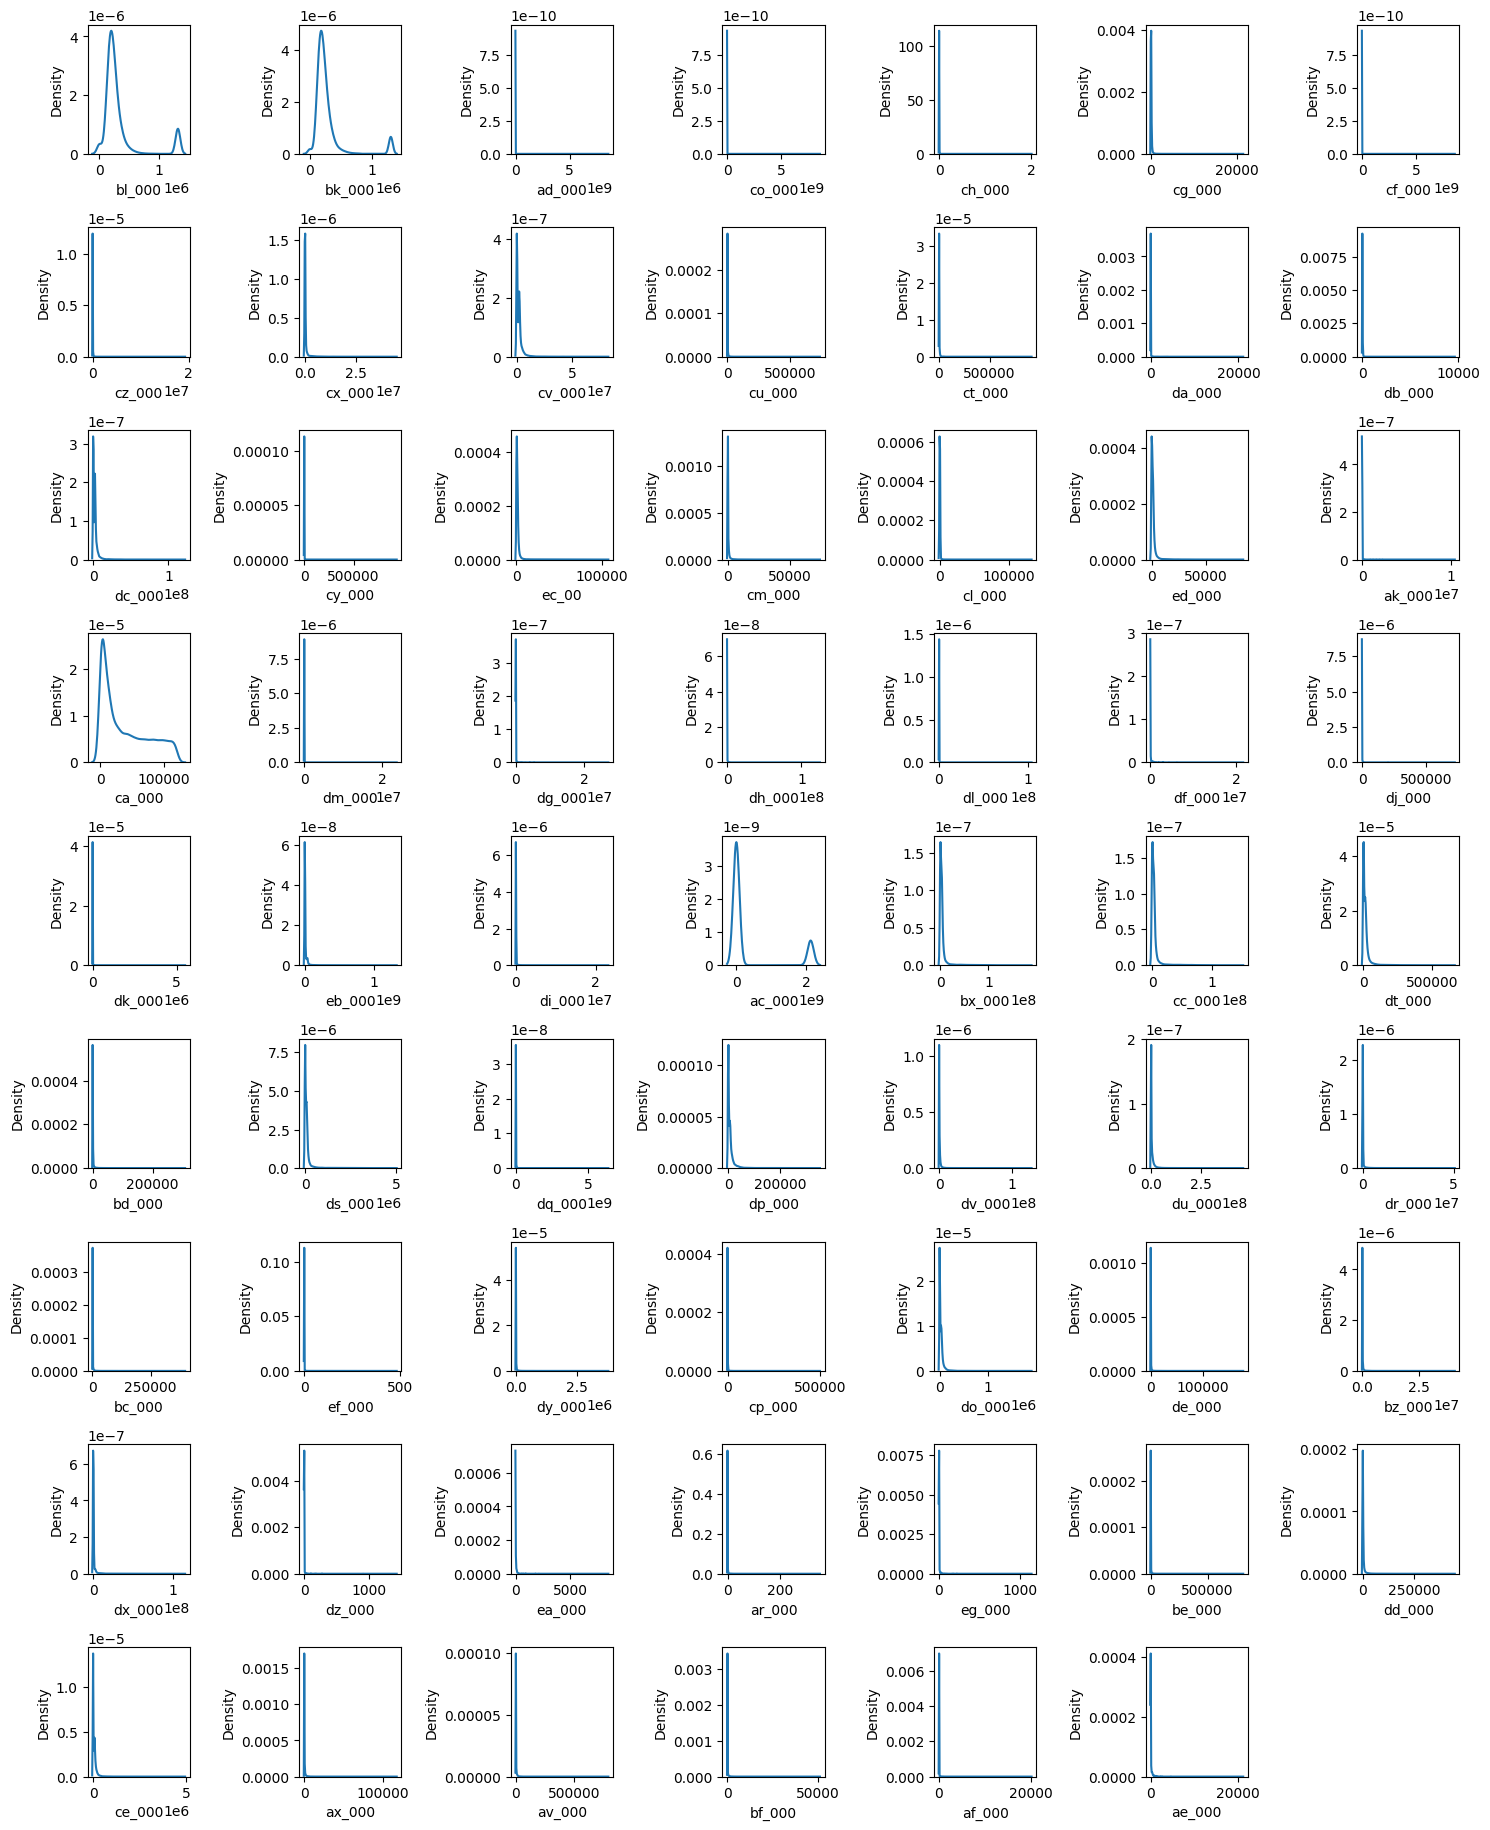

In [ ]:
plt.figure(figsize = (15,20))
for i in range(len(missing_data_index_2000)):
    plt.subplot (10,7,i+1)
    sns.kdeplot(df[missing_data_index_2000[i]])
    plt.tight_layout()
plt.show()

* 1st, treat the missing values
* 2nd, treat the outliers

In [28]:
df.head()

class   aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0      0  76698.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1      0  33058.0  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2      0  41040.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3      0     12.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4      0  60874.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0   318.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 163 columns]

In [29]:
x = df.drop('class',axis = 1)
y = df['class']

In [30]:
print('X shape',x.shape,'\n','Y shape',y.shape)

X shape (60000, 162) 
 Y shape (60000,)


In [31]:
y.value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [ ]:
knn_imputer = KNNImputer()
rs = RobustScaler()

In [32]:
def cross_valscore(x,y):
    cross_val_scores = {}
    no_of_neighbors = [3,5,7,9]
    scorers = ['accuracy','f1_weighted','balanced_accuracy']
    for j in scorers:
        cross_val_scores[j] = {}
        for i in tqdm(no_of_neighbors):
            pipeline = Pipeline(steps=[('KNN_imputer',KNNImputer(n_neighbors = i)),
                                              ('Robust_scaler',RobustScaler()),
                                              ('SMOTETomek', SMOTETomek(n_jobs=-1,sampling_strategy='minority',random_state=8)),
                                              ('XGB', XGBClassifier(n_jobs = -1))],
                                              verbose=True)
            score = cross_val_score(estimator = pipeline,
                                  X = x,
                                  y = y,
                                  scoring = j,
                                  cv = 5,
                                  n_jobs = -1)
            cross_val_scores[j][i] = score.mean()

#     key_balanced_accuracy = max(cross_val_scores['balanced_accuracy'], key = cross_val_scores['balanced_accuracy'].get)
#     key_f1_weighted = max(cross_val_scores['f1_weighted'], key = cross_val_scores['f1_weighted'].get)

    report_df = pd.DataFrame()
    report_df['accuracy']=cross_val_scores['accuracy']
    report_df['balanced_accuracy']=cross_val_scores['balanced_accuracy']
    report_df['f1_weighted']=cross_val_scores['f1_weighted']


    return (report_df.sort_values(by = ['balanced_accuracy','f1_weighted'],ascending = False))
#             {key_f1_weighted:cross_val_scores['f1_weighted'][key_f1_weighted]},
#             {key_balanced_accuracy:cross_val_scores['balanced_accuracy'][key_balanced_accuracy]})

### Experiment 1 (Imputation alone)

In [ ]:
report_df = cross_valscore(x.iloc[:10000,:],y.iloc[:10000])
report_df

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [07:02<00:00, 105.67s/it]


accuracy  balanced_accuracy  f1_weighted
3    0.9879           0.878227     0.988312
5    0.9868           0.877666     0.987390
9    0.9873           0.867868     0.987700
7    0.9873           0.865355     0.987678

In [ ]:
report_df

accuracy  balanced_accuracy  f1_weighted
3    0.9879           0.878227     0.988312
5    0.9868           0.877666     0.987390
9    0.9873           0.867868     0.987700
7    0.9873           0.865355     0.987678

### Experiment 2 (Imputation 1st, then robust scaling)

#### 2.1 Imputation with 'weights' as 'distance'

In [ ]:
knn_imputer = KNNImputer(n_neighbors = 5,weights = 'distance')

In [ ]:
x_knn = knn_imputer.fit_transform(x,y)

In [ ]:
knn_df = pd.DataFrame(x_knn,columns = x.columns)

In [ ]:
knn_robust = RobustScaler()

In [ ]:
x_knn_robust = knn_robust.fit_transform(knn_df)

In [ ]:
x_knn_robust_df = pd.DataFrame(x_knn_robust,columns = x.columns)

In [ ]:
x_knn_robust_df.head()

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split (x_knn_robust_df,y, random_state=3, test_size=0.25)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

In [ ]:
knn_robust_xgb_model = XGBClassifier(n_jobs =-1)

In [ ]:
knn_robust_xgb_model.fit(X = xtrain, y = ytrain)

In [ ]:
y_pred = knn_robust_xgb_model.predict(xtest)

In [ ]:
balanced_accuracy_score(y_true = ytest, y_pred = y_pred)

In [ ]:
f1_score(y_true = ytest, y_pred = y_pred)

#### 2.2 Imputation with 'weights' as 'uniform'

In [ ]:
knn_imputer_uniform = KNNImputer(n_neighbors = 5,weights = 'uniform')

In [ ]:
x_knn_uniform = knn_imputer_uniform.fit_transform(x,y)

In [ ]:
x_knn_robust_uniform = RobustScaler().fit_transform(x_knn_uniform)

In [ ]:
xtrain_uniform,xtest_uniform,ytrain_uniform,ytest_uniform = train_test_split (x_knn_robust_uniform,y, random_state=3, test_size=0.25)

In [ ]:
xtrain_uniform.shape,xtest_uniform.shape,ytrain_uniform.shape,ytest_uniform.shape

In [ ]:
knn_uniform_robust_xgb_model = XGBClassifier(n_jobs =-1)

In [ ]:
knn_uniform_robust_xgb_model.fit(X = xtrain_uniform, y = ytrain_uniform)

In [ ]:
y_uniform_pred = knn_uniform_robust_xgb_model.predict(xtest_uniform)

In [ ]:
balanced_accuracy_score(y_true = ytest_uniform, y_pred = y_uniform_pred)

In [ ]:
f1_score(y_true = ytest_uniform, y_pred = y_uniform_pred)

### Experiment 3 (Robust scaling 1st, then KNN Imputation)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split (x,y, random_state=8, test_size=0.30)
weight = ['distance','uniform']
n_neighbors = [3,5,7]
score_robust = {}
for i in weight:
    score_robust[i] = {}
    for j in n_neighbors:
        score_robust[i][j] = {}
        pipeline_1 = Pipeline(steps=[('Robust_scaler',RobustScaler()),
                                     ('KNN_imputer',KNNImputer(weights=i, n_neighbors=j)),
                                     ('SMOTETomek', SMOTETomek(sampling_strategy='minority',random_state=8)),
                                     ('XGB', XGBClassifier(n_jobs=-1))],
                                     verbose=True)

        pipeline_1.fit(xtrain,ytrain)
        y_pred = pipeline_1.predict(xtest)

        acc_score = accuracy_score(y_true=ytest, y_pred=y_pred)
        bal_acc_score = balanced_accuracy_score(y_true=ytest, y_pred=y_pred)
        f1_score_ = f1_score(y_true=ytest, y_pred=y_pred)

        score_robust[i][j]['acc_score'] = acc_score
        score_robust[i][j]['bal_acc_score'] = bal_acc_score
        score_robust[i][j]['f1_score'] = f1_score_

[Pipeline] ..... (step 1 of 4) Processing Robust_scaler, total=   0.4s


In [ ]:
score_robust

{'distance': {3: {'acc_score': 0.9926, 'bal_acc_score': 0.91100167937863},
  5: {'acc_score': 0.993, 'bal_acc_score': 0.9191339829263172},
  7: {'acc_score': 0.9929333333333333, 'bal_acc_score': 0.9131533832481982}},
 'uniform': {3: {'acc_score': 0.9932666666666666,
   'bal_acc_score': 0.9034116751801833},
  5: {'acc_score': 0.9922, 'bal_acc_score': 0.9107983171226646},
  7: {'acc_score': 0.9922666666666666, 'bal_acc_score': 0.9068677401861311}}}

In [ ]:
pd.DataFrame(score_robust['distance'])

3         5         7
acc_score      0.992600  0.993000  0.992933
bal_acc_score  0.911002  0.919134  0.913153

In [ ]:
pd.DataFrame(score_robust['uniform'])

3         5         7
acc_score      0.993267  0.992200  0.992267
bal_acc_score  0.903412  0.910798  0.906868

In [ ]:
score = {'distance': {3: {'acc_score': 0.9924666666666667,
   'bal_acc_score': 0.9089516566370444},
  5: {'acc_score': 0.9925333333333334, 'bal_acc_score': 0.9109677856693024},
  7: {'acc_score': 0.9924666666666667, 'bal_acc_score': 0.9148983626058358}},
 'uniform': {3: {'acc_score': 0.9922, 'bal_acc_score': 0.9068338464768035},
  5: {'acc_score': 0.993, 'bal_acc_score': 0.9171517476033868}}
}

In [ ]:
pd.DataFrame(score['uniform'])

3         5
acc_score      0.992200  0.993000
bal_acc_score  0.906834  0.917152

In [ ]:
pd.DataFrame(score['distance'])

3         5         7
acc_score      0.992467  0.992533  0.992467
bal_acc_score  0.908952  0.910968  0.914898

In [ ]:
robust_first_pipeline = Pipeline(steps=[('Robust_scaler',RobustScaler()),
                                        ('KNN_imputer',KNNImputer())])
robust_first_pipeline

In [ ]:
sample_array1 = robust_first_pipeline.fit_transform(x.iloc[:10000,:])
sample_df1 = pd.DataFrame(sample_array1,columns = robust_first_pipeline.get_feature_names_out())
sample_df1.head()

In [ ]:
sample_df1.isnull().any().unique()

In [ ]:
knn_first_pipeline_model_imb = Pipeline(steps=[('KNN_imputer',KNNImputer()),
                                              ('Robust_scaler',RobustScaler()),
                                              ('SMOTETomek', SMOTETomek(n_jobs=-1,sampling_strategy='minority',random_state=8)),
                                              ('XGB', XGBClassifier(n_jobs = -1))],
                                              verbose=True)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=8,test_size=0.25)

knn_first_pipeline_model_imb.fit(X = x_train, y = y_train)

y_pred_imb_knn_first_pipeline_model = knn_first_pipeline_model_imb.predict(X = x_test)

print(balanced_accuracy_score(y_true = y_test,
                        y_pred = y_pred_imb_knn_first_pipeline_model))

print(f1_score(y_true = y_test,
        y_pred = y_pred_imb_knn_first_pipeline_model))

print(accuracy_score(y_true = y_test,
                     y_pred = y_pred_imb_knn_first_pipeline_model))

[Pipeline] ....... (step 1 of 4) Processing KNN_imputer, total=12.0min
[Pipeline] ..... (step 2 of 4) Processing Robust_scaler, total=   0.2s
[Pipeline] ........ (step 3 of 4) Processing SMOTETomek, total=  38.6s
[Pipeline] ............... (step 4 of 4) Processing XGB, total=   5.4s
0.9211501119585753
0.8015267175572519
0.9930666666666667


In [ ]:
robust_first_pipeline_model_imb = Pipeline(steps=[('Robust_scaler',RobustScaler()),
                                               ('KNN_imputer',KNNImputer()),
                                               ('SMOTETomek', SMOTETomek(n_jobs=-1,sampling_strategy='minority',random_state=8)),
                                               ('XGB', XGBClassifier(n_jobs = -1))],
                                               verbose=True)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=8,test_size=0.25)

robust_first_pipeline_model_imb.fit(X = x_train, y = y_train)

y_pred_imb_robust_first_pipeline_model = robust_first_pipeline_model_imb.predict(X = x_test)

print(balanced_accuracy_score(y_true = y_test,
                        y_pred = y_pred_imb_robust_first_pipeline_model))

print(f1_score(y_true = y_test,
        y_pred = y_pred_imb_robust_first_pipeline_model))

print(accuracy_score(y_true = y_test,
                     y_pred = y_pred_imb_robust_first_pipeline_model))

[Pipeline] ..... (step 1 of 4) Processing Robust_scaler, total=   0.3s
[Pipeline] ....... (step 2 of 4) Processing KNN_imputer, total=12.2min
[Pipeline] ........ (step 3 of 4) Processing SMOTETomek, total=  36.5s
[Pipeline] ............... (step 4 of 4) Processing XGB, total=   5.2s
0.9107983171226646
0.7779886148007591
0.9922


In [ ]:
knn_first_pipeline_model_imb

Pipeline(steps=[('KNN_imputer', KNNImputer()),
                ('Robust_scaler', RobustScaler()),
                ('SMOTETomek',
                 SMOTETomek(n_jobs=-1, random_state=8,
                            sampling_strategy='minority')),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=F...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))],
         verbose=True)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=8,test_size=0.25)

knn_first_pipeline_model_imb.fit(X = x_train, y = y_train)

[Pipeline] ....... (step 1 of 4) Processing KNN_imputer, total=20.4min
[Pipeline] ..... (step 2 of 4) Processing Robust_scaler, total=   0.4s
[Pipeline] ........ (step 3 of 4) Processing SMOTETomek, total=  32.7s
[Pipeline] ............... (step 4 of 4) Processing XGB, total=   4.9s


Pipeline(steps=[('KNN_imputer', KNNImputer()),
                ('Robust_scaler', RobustScaler()),
                ('SMOTETomek',
                 SMOTETomek(n_jobs=-1, random_state=8,
                            sampling_strategy='minority')),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=F...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))],
         verbose=True)

In [ ]:
# knn_first_pipeline_model_imb.fit_resample

In [ ]:
y_pred_knn_first_pipeline_model = knn_first_pipeline_model_imb.predict(X = x_test)

In [ ]:
print(balanced_accuracy_score(y_true = y_test,
                        y_pred = y_pred_knn_first_pipeline_model))

print(f1_score(y_true = y_test,
        y_pred = y_pred_knn_first_pipeline_model))

print(accuracy_score(y_true = y_test,
                     y_pred = y_pred_knn_first_pipeline_model))

0.9211501119585753
0.8015267175572519
0.9930666666666667


In [ ]:
knn_first_pipeline_model = Pipeline(steps=[('KNN_imputer',KNNImputer()),
                                              ('Robust_scaler',RobustScaler()),
                                              ('XGB', XGBClassifier(n_jobs = -1))],
                                        verbose=True)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

knn_first_pipeline_model.fit(X = x_train, y = y_train)

y_pred_knn_first_pipeline_model = knn_first_pipeline_model.predict(X = x_test)

print(balanced_accuracy_score(y_true = y_test,
                        y_pred = y_pred_knn_first_pipeline_model))

print(f1_score(y_true = y_test,
        y_pred = y_pred_knn_first_pipeline_model))


In [ ]:
robust_first_pipeline_model = Pipeline(steps=[('Robust_scaler',RobustScaler()),
                                              ('KNN_imputer',KNNImputer()),
                                              ('XGB', XGBClassifier(n_jobs = -1))])
robust_first_pipeline_model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
robust_first_pipeline_model.fit(X = x_train, y = y_train)

In [ ]:
y_pred_robust_first_pipeline_model = robust_first_pipeline_model.predict(X = x_test)

In [ ]:
balanced_accuracy_score(y_true = y_test,
                        y_pred = y_pred_robust_first_pipeline_model)

In [ ]:
f1_score(y_true = y_test,
        y_pred = y_pred_robust_first_pipeline_model)

In [ ]:
# robust_first_transformer = ColumnTransformer([
#     ('Robust_scaler',RobustScaler(),x.columns),
#     ('KNN_imputer',KNNImputer(),x.columns)
#     ])
# sample_array = robust_first_transformer.fit_transform(x.iloc[:10000,:])
# sample_df = pd.DataFrame(sample_array)
# sample_df.head()

In [ ]:
('XGB_Classifier',XGBClassifier(n_jobs =-1))

In [ ]:
x_robust = rs.fit_transform(x)

In [ ]:
report_df_robust = cross_valscore(pd.DataFrame(x_robust,columns = x.columns).iloc[:10000,:],y.iloc[:10000])
report_df_robust

We can thus conclude that:
* We can impute 1st with Knn-Imputer with no. of neighbors as 5
* After Imputing, we can use robust scaler on the imputed dataset
* Then we can use a state of art algorithm (like xgboost) to get a prediction
* Then we can check balanced accuracy score (we can prefer balanced accuracy score than f1 score because the dataset is imbalanced)

### Experiment 4
* Visualize the data using scatter plot, divide them into separate clusters, then use individual models on these clusters to check if performance increases

* Visualization is done for the entire dataset by performing:
    1. PCA
    2. UMAP

In [35]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 995.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=36b72f7a06a8bde047d65e79aa954ef52c20f52f35f6c28d0ceb16152af0deb1
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [36]:
from umap import UMAP

In [37]:
umap = UMAP()



*   To use UMAP,
      * The data should be clean of missing values first
      * Then, the data should be scaled (either using Standard Scaler, Min-Max Scaler or using Robust Scaler)
      * Once these steps are done, you can use UMAP



In [42]:
print('X shape',x.shape,'\n','Y shape',y.shape)

X shape (60000, 162) 
 Y shape (60000,)


The data has missing values, let's treat it 1st

In [43]:
knn_imputer = KNNImputer()
x_imputed = knn_imputer.fit_transform(X = x, y = y)

In [48]:
print(knn_imputer.feature_names_in_)

['aa_000' 'ac_000' 'ad_000' 'ae_000' 'af_000' 'ag_000' 'ag_001' 'ag_002'
 'ag_003' 'ag_004' 'ag_005' 'ag_006' 'ag_007' 'ag_008' 'ag_009' 'ah_000'
 'ai_000' 'aj_000' 'ak_000' 'al_000' 'am_0' 'an_000' 'ao_000' 'ap_000'
 'aq_000' 'ar_000' 'as_000' 'at_000' 'au_000' 'av_000' 'ax_000' 'ay_000'
 'ay_001' 'ay_002' 'ay_003' 'ay_004' 'ay_005' 'ay_006' 'ay_007' 'ay_008'
 'ay_009' 'az_000' 'az_001' 'az_002' 'az_003' 'az_004' 'az_005' 'az_006'
 'az_007' 'az_008' 'az_009' 'ba_000' 'ba_001' 'ba_002' 'ba_003' 'ba_004'
 'ba_005' 'ba_006' 'ba_007' 'ba_008' 'ba_009' 'bb_000' 'bc_000' 'bd_000'
 'be_000' 'bf_000' 'bg_000' 'bh_000' 'bi_000' 'bj_000' 'bk_000' 'bl_000'
 'bs_000' 'bt_000' 'bu_000' 'bv_000' 'bx_000' 'by_000' 'bz_000' 'ca_000'
 'cb_000' 'cc_000' 'cd_000' 'ce_000' 'cf_000' 'cg_000' 'ch_000' 'ci_000'
 'cj_000' 'ck_000' 'cl_000' 'cm_000' 'cn_000' 'cn_001' 'cn_002' 'cn_003'
 'cn_004' 'cn_005' 'cn_006' 'cn_007' 'cn_008' 'cn_009' 'co_000' 'cp_000'
 'cq_000' 'cs_000' 'cs_001' 'cs_002' 'cs_003' 'cs_004

In [53]:
x_umap = pd.DataFrame(x_imputed,columns = knn_imputer.feature_names_in_)

In [54]:
x_umap.isna().any().unique()

array([False])

In [55]:
x_umap_robust = RobustScaler().fit_transform(X = x_umap, y = y)

In [57]:
x_umap_robust_df = pd.DataFrame(x_umap_robust,columns=x_umap.columns)

In [61]:
x_umap_reduced = umap.fit_transform(X = x_umap_robust_df)

In [62]:
x_umap_reduced.shape

(60000, 2)

In [69]:
pd.DataFrame(x_umap_reduced).head()

0          1
0  19.982794   0.510555
1   4.789269  -0.342472
2   2.361468  -2.529482
3   4.250998   7.935065
4  11.752047  15.057892

<Axes: xlabel='0', ylabel='1'>

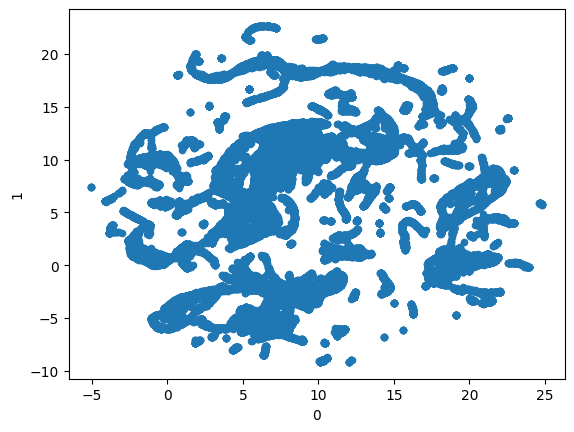

In [67]:
pd.DataFrame(x_umap_reduced).plot(x = 0, y = 1,kind = 'scatter')

Using PCA

In [70]:
x_umap_robust_df.head()

aa_000        ac_000    ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0  0.960028  1.421893e+06  0.133690     0.0     0.0     0.0     0.0     0.0   
1  0.047707 -1.214548e-01  0.221390     0.0     0.0     0.0     0.0     0.0   
2  0.214575  3.069736e-02 -0.347594     0.0     0.0     0.0     0.0     0.0   
3 -0.643141 -7.474141e-02 -0.438503     0.0    10.0     0.0     0.0     0.0   
4  0.629218  7.914581e-01  0.609626     0.0     0.0     0.0     0.0     0.0   

   ag_003    ag_004  ...    ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0  0.673569  ...  2.315743  1.761533  1.080386  0.704193  0.902976   
1     0.0  0.292058  ...  0.433736  0.308070  0.157906  0.141867  0.154202   
2     0.0 -0.041453  ...  0.102831  0.223938  0.439749  0.553251  0.835897   
3   318.0 -0.030126  ... -0.533920 -0.512501 -0.474527 -0.473079 -0.332748   
4     0.0  0.804153  ...  0.894661  0.546500  0.399433  0.396926  0.712771   

     ee_007    ee_008    ee_009  ef_000  eg_000  
0  0.699377  0.500546  0.000000     0.0     0.0  
1  0.241217  0.676060  0.744786     0.0     0.0  
2  0.699771  0.658417  0.255214     0.0     0.0  
3 -0.242732 -0.027208  0.000000     4.0    32.0  
4  1.615530  3.100467  0.604767     0.0     0.0  

[5 rows x 162 columns]

In [73]:
pca = PCA()

In [74]:
x_pca = pca.fit(X = x_umap_robust_df)

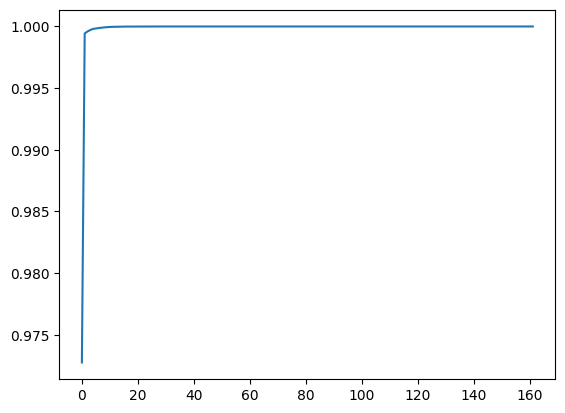

In [82]:
plt.plot(np.cumsum(x_pca.explained_variance_ratio_))

In [84]:
np.cumsum(x_pca.explained_variance_ratio_)

array([0.97275174, 0.99943278, 0.99959655, 0.99971158, 0.99980274,
       0.99984062, 0.99987263, 0.99990136, 0.99992503, 0.99994737,
       0.99996057, 0.99997219, 0.99997746, 0.9999827 , 0.99998672,
       0.99998963, 0.9999919 , 0.9999933 , 0.99999458, 0.9999958 ,
       0.99999693, 0.99999775, 0.99999839, 0.99999896, 0.99999935,
       0.99999964, 0.99999978, 0.99999989, 0.99999993, 0.99999995,
       0.99999997, 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [91]:
pca_ = PCA(n_components = 3)

In [92]:
x_pca_ = pca_.fit_transform(X = x_umap_robust_df)

In [94]:
np.cumsum(pca_.explained_variance_ratio_)

array([0.97275174, 0.99943278, 0.99959655])

In [95]:
pd.DataFrame(x_pca_).head()

0             1              2
0 -6.882446e+06 -71927.713095 -259160.735344
1 -6.882735e+06 -71845.535498 -247645.561558
2 -6.882735e+06 -71846.151194 -247646.021493
3 -6.880717e+06 -71845.090585 -247186.442026
4 -6.882735e+06 -71846.233502 -247579.358864

<Axes: xlabel='0', ylabel='1'>

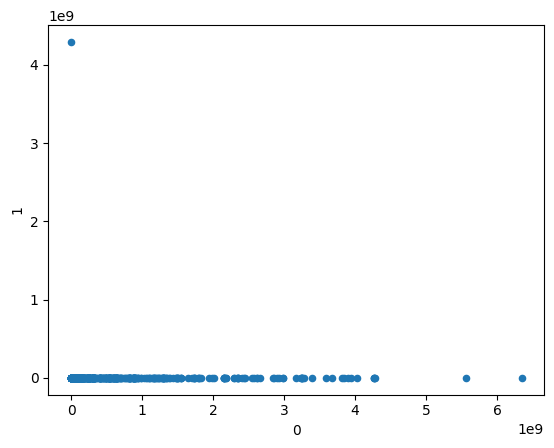

In [89]:
pd.DataFrame(x_pca_).plot(x=0, y=1, kind='scatter')

In [96]:
import plotly.express as px

In [98]:
px.scatter_3d(x = pd.DataFrame(x_pca_)[0],
              y = pd.DataFrame(x_pca_)[1],
              z = pd.DataFrame(x_pca_)[2])

We will use UMAP for dimensionality reduction as it works and visualizes the data better than PCA

We will now try to cluster the data using DBSCAN

In [99]:
from sklearn.cluster import DBSCAN

In [100]:
dbscan = DBSCAN(eps=0.5, min_samples=5,n_jobs = -1)

In [104]:
any(x_umap_robust_df.columns == 'class')

False

As there is no Y column in the 'x_umap_robust_df', we can pass it directly into the fit_predict method of dbscan object

In [108]:
dbscan_labels = dbscan.fit_predict(x_umap_robust_df)

In [137]:
pd.unique(dbscan_labels)

array([-1,  0,  1,  2,  3, 45,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 20,
       14, 15, 22, 16, 34, 17, 18, 19, 23, 21, 46, 47, 29, 43, 24, 32, 25,
       26, 27, 28, 30, 42, 31, 33, 35, 36, 37, 38, 39, 40, 41, 44])

In [111]:
x_knn_robust_dbscan_df = x_umap_robust_df.copy()
x_knn_robust_dbscan_df['labels'] = dbscan_labels
x_knn_robust_dbscan_df.head()

aa_000        ac_000    ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0  0.960028  1.421893e+06  0.133690     0.0     0.0     0.0     0.0     0.0   
1  0.047707 -1.214548e-01  0.221390     0.0     0.0     0.0     0.0     0.0   
2  0.214575  3.069736e-02 -0.347594     0.0     0.0     0.0     0.0     0.0   
3 -0.643141 -7.474141e-02 -0.438503     0.0    10.0     0.0     0.0     0.0   
4  0.629218  7.914581e-01  0.609626     0.0     0.0     0.0     0.0     0.0   

   ag_003    ag_004  ...    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  0.673569  ...  1.761533  1.080386  0.704193  0.902976  0.699377   
1     0.0  0.292058  ...  0.308070  0.157906  0.141867  0.154202  0.241217   
2     0.0 -0.041453  ...  0.223938  0.439749  0.553251  0.835897  0.699771   
3   318.0 -0.030126  ... -0.512501 -0.474527 -0.473079 -0.332748 -0.242732   
4     0.0  0.804153  ...  0.546500  0.399433  0.396926  0.712771  1.615530   

     ee_008    ee_009  ef_000  eg_000  labels  
0  0.500546  0.000000     0.0     0.0      -1  
1  0.676060  0.744786     0.0     0.0      -1  
2  0.658417  0.255214     0.0     0.0      -1  
3 -0.027208  0.000000     4.0    32.0      -1  
4  3.100467  0.604767     0.0     0.0      -1  

[5 rows x 163 columns]

In [115]:
from umap import UMAP

In [116]:
umap_1 = UMAP()

In [118]:
x_knn_robust_dbscan_df_umap = umap_1.fit_transform(X = x_umap_robust_df, y = x_knn_robust_dbscan_df['labels'])

In [120]:
x_knn_robust_dbscan_df_umap.shape

(60000, 2)

In [139]:
pd.DataFrame(x_knn_robust_dbscan_df_umap).head()

0          1
0  -9.523498  11.212993
1  16.079170  12.236633
2  19.946548  19.244190
3   8.958791   4.740083
4  -0.410007  14.543566

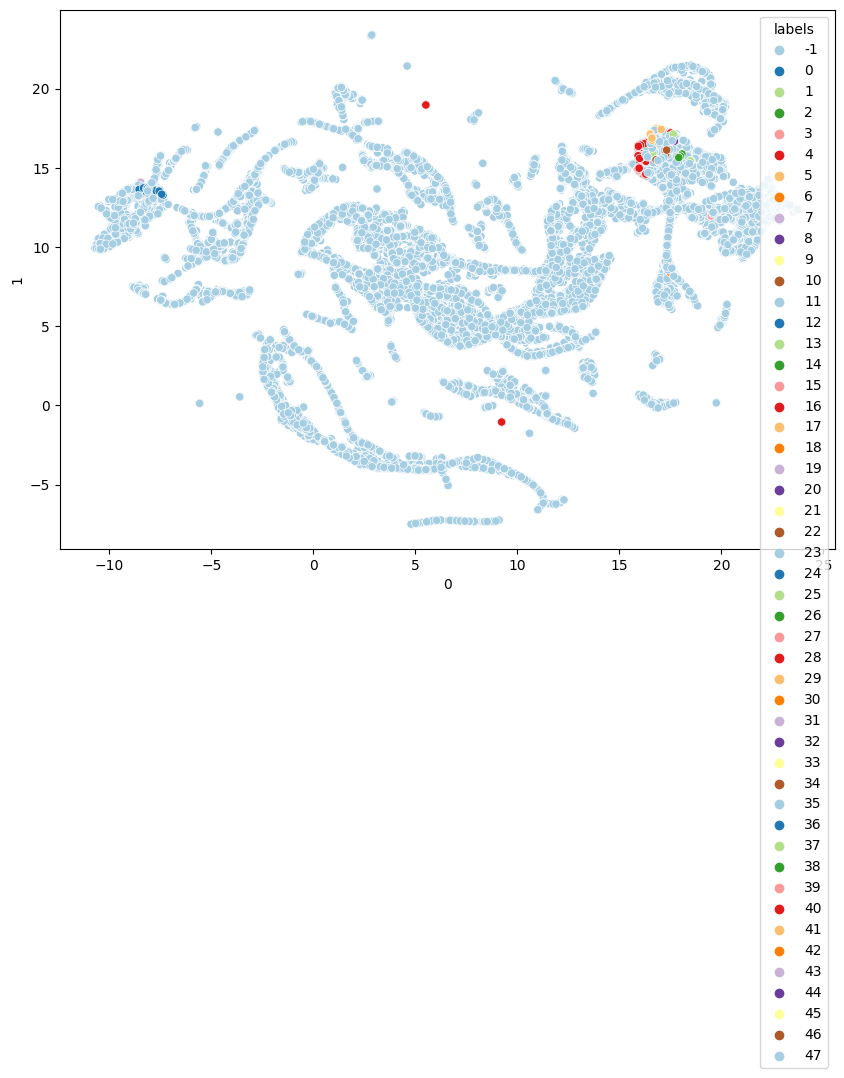

In [128]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=pd.DataFrame(x_knn_robust_dbscan_df_umap),
                x=pd.DataFrame(x_knn_robust_dbscan_df_umap)[0],
                y=pd.DataFrame(x_knn_robust_dbscan_df_umap)[1],
                hue=x_knn_robust_dbscan_df['labels'],
                palette="Paired",
                markers = True)
plt.show()

In [129]:
umap_2 = UMAP(n_components = 3)
x_knn_robust_dbscan_df_umap_2 = umap_2.fit_transform(X = x_umap_robust_df, y = x_knn_robust_dbscan_df['labels'])
x_knn_robust_dbscan_df_umap_2.shape

(60000, 3)

In [132]:
px.scatter_3d(x = pd.DataFrame(x_knn_robust_dbscan_df_umap_2)[0],
              y = pd.DataFrame(x_knn_robust_dbscan_df_umap_2)[1],
              z = pd.DataFrame(x_knn_robust_dbscan_df_umap_2)[2],
              color = x_knn_robust_dbscan_df['labels'])

In [133]:
from sklearn.metrics import silhouette_score

In [136]:
silhouette_score(X = x_knn_robust_dbscan_df.drop(['labels'],axis = 1),
                 labels = x_knn_robust_dbscan_df['labels'])

-0.9118475134163464

In [150]:
def sil_score(eps,min_samples,X_,labels_):
  from sklearn.metrics import silhouette_score
  score = {}
  silhouette_score_ = silhouette_score(X = X_, labels = labels_)
  score[f'eps: {eps} & min_samples: {min_samples}'] = silhouette_score_
  return score

In [149]:
sil_score(0.5,5,x_knn_robust_dbscan_df.iloc[:10000,:].drop(['labels'],axis = 1),x_knn_robust_dbscan_df['labels'].iloc[:10000])

{'eps: 0.5 & min_samples: 5': -0.9060060040444149}

In [148]:
x_knn_robust_dbscan_df.shape

(60000, 163)

In [ ]:
params = {'eps':[0.1,0.2,0.3,0.4,0.5],
          'min_samples' : [1,2,3,4,5,6,7,8,9,10]}
gscv = GridSearchCV(estimator = DBSCAN(n_jobs=-1),
                   param_grid = params,
                   scoring= sil_score,
                   n_jobs= -1,
                   cv=5,
                   verbose=3)
gscv.fit(x_knn_robust_dbscan_df.iloc[:10000,:].drop(['labels'],axis = 1),x_knn_robust_dbscan_df['labels'].iloc[:10000])

Fitting 5 folds for each of 50 candidates, totalling 250 fits
